# Course 2 Task 3 - Evaluate Models

In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv('Credit_Report_Updated.csv', header=0)
rawData.head()

CUST_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0        1      20000    1          1         1   24      2      2     -1   
1        2     120000    1          1         2   26     -1      2      0   
2        3      90000    1          1         2   34      0      0      0   
3        4      50000    1          1         1   37      0      0      0   
4        5      50000    0          1         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

Selecting features for classification by creating 2 data sets

In [3]:
# Features Data Sets
features = rawData.iloc[:,2:12]
print('Summary of feature sample')
features.head()

Summary of feature sample


SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0    1          1         1   24      2      2     -1     -1     -2     -2
1    1          1         2   26     -1      2      0      0      0      2
2    1          1         2   34      0      0      0      0      0      0
3    1          1         1   37      0      0      0      0      0      0
4    0          1         1   57     -1      0     -1      0      0      0

In [4]:
#Select dependent variable
y = rawData['default payment next month'].copy()
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [5]:
#Select independent variables 
X1 = rawData[features1].copy()
X2 = rawData[features2].copy()
X1.head()
X2.head()

NameError: name 'features1' is not defined

In [6]:
#Feature Scaling and data normalization 
normalizedfeatures=features.apply(lambda x : (x-np.mean(x))/np.std(x))
normalizedfeatures.head()

SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
0  0.810161  -0.302184 -1.057295 -1.246020  1.794564  1.782348 -0.696663   
1  0.810161  -0.302184  0.858557 -1.029047 -0.874991  1.782348  0.138865   
2  0.810161  -0.302184  0.858557 -0.161156  0.014861  0.111736  0.138865   
3  0.810161  -0.302184 -1.057295  0.164303  0.014861  0.111736  0.138865   
4 -1.234323  -0.302184 -1.057295  2.334029 -0.874991  0.111736 -0.696663   

      PAY_4     PAY_5     PAY_6  
0 -0.666599 -1.530046 -1.486041  
1  0.188746  0.234917  1.992316  
2  0.188746  0.234917  0.253137  
3  0.188746  0.234917  0.253137  
4  0.188746  0.234917  0.253137

In [7]:
#Split Dataset into training set(70%) and test set(30%) with normalized pre selected features
#X features

X = normalizedfeatures
X2 = features
y = y

#  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

X_train.shape


(21000, 10)

In [8]:
# X2 train shape containing nonnormalized features
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size = 0.3,random_state = 1)

X2_train.shape

(21000, 10)

In [9]:
#X_Train Head
X_train.head()

SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
4936  -1.234323   1.070548  0.858557 -1.246020 -0.874991 -0.723570 -0.696663   
4788  -1.234323  -0.302184 -1.057295  1.791598  1.794564  0.111736  0.138865   
8447   0.810161  -0.302184  0.858557 -1.029047  0.014861  0.111736  0.138865   
4535  -1.234323  -0.302184  0.858557  0.164303  0.904712 -1.558876 -1.532192   
27563 -1.234323  -0.302184  0.858557  2.225543  0.014861  0.111736  0.138865   

          PAY_4     PAY_5     PAY_6  
4936  -0.666599 -0.647565 -1.486041  
4788   0.188746  0.234917  0.253137  
8447   0.188746  0.234917  0.253137  
4535  -1.521944 -1.530046 -1.486041  
27563  0.188746  0.234917  0.253137

In [10]:
#X2_Train Head
X2_train.head()

SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
4936     0          2         2   24     -1     -1     -1     -1     -1     -2
4788     0          1         1   52      2      0      0      0      0      0
8447     1          1         2   26      0      0      0      0      0      0
4535     0          1         2   37      1     -2     -2     -2     -2     -2
27563    0          1         2   56      0      0      0      0      0      0

In [11]:
X_test.shape

(9000, 10)

# Algorithms

Logistics Regression - Model 1

In [12]:
#Testing Logistic Regression Model 1
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [13]:
y_pred1 = logmodel.predict(X_test)

In [14]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc1=roc_auc_score(y_test, y_pred1)
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model1 = pd.DataFrame([['Logistic Regression', acc1,prec1,rec1, f1,roc1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model1

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  Logistic Regression  0.806667   0.715232   0.216  0.331797  0.595714

Testing Stochastic Gradient Decent - Model 2

In [15]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [16]:
y_pred2 = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc2=roc_auc_score(y_test, y_pred2)
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f2 = f1_score(y_test, y_pred2)

model2 = pd.DataFrame([['Stochastic Gradient Descent', acc2,prec2,rec2, f2,roc2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model2

Model  Accuracy  Precision  Recall  F1 Score  \
0  Stochastic Gradient Descent  0.814333   0.703841   0.284  0.404703   

        ROC  
0  0.624929

K-Nearest Neighbor - Model 3 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

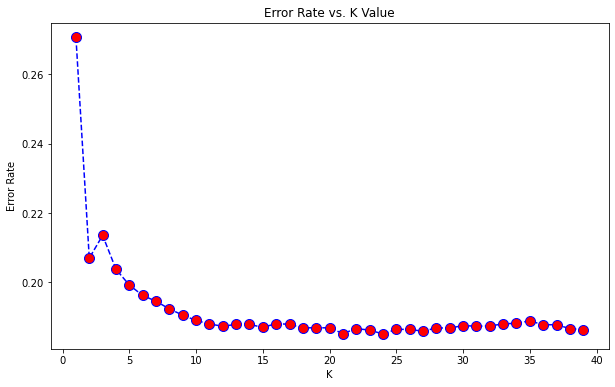

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_pred3 = knn.predict(X_test)

In [22]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc3 =roc_auc_score(y_test, y_pred3)
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f3 = f1_score(y_test, y_pred3)

model3 = pd.DataFrame([['K-Nearest Neighbour', acc3,prec3,rec3, f3,roc3]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model3

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  K-Nearest Neighbour  0.803778    0.62635    0.29  0.396446  0.620286

Support Vector Machine - Model 4

In [23]:
#SVM to Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

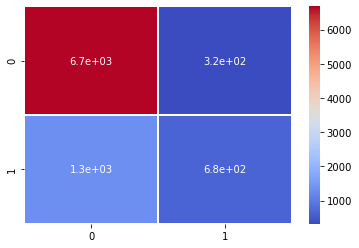

In [24]:
#Predict the Test set using heat map 
y_pred4 = scv.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4,annot= True,linewidths=1,cmap='coolwarm')

In [25]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc4=roc_auc_score(y_test, y_pred4)
acc4 = accuracy_score(y_test, y_pred4)
prec4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
f4 = f1_score(y_test, y_pred4)

model4 = pd.DataFrame([['Support Vector Machine', acc4,prec4,rec4, f4,roc4]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model4

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  Support Vector Machine     0.818   0.680639   0.341  0.454364  0.647643

Gaussian Naive Bayes - Model 5

In [26]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [27]:
y_pred5 =naive_bayes.predict(X_test)

from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred5)
cm5

array([[6424,  576],
       [1198,  802]], dtype=int64)

In [28]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc5=roc_auc_score(y_test, y_pred5)
acc5 = accuracy_score(y_test, y_pred5)
prec5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
f5 = f1_score(y_test, y_pred5)

model5= pd.DataFrame([['Gaussian Naive Bayes', acc5,prec5,rec5, f5,roc5]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model5

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  Gaussian Naive Bayes  0.802889   0.582003   0.401  0.474837  0.659357

Decision Tree Classifier - Model 6

In [29]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [30]:
#non normalised x2
dct.fit(X2_train,y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
#Normalised
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
y_pred6 = dct.predict(X_test)
y_pred6b = dct.predict(X2_test)

from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred6)
cm6a = confusion_matrix(y_test, y_pred6b)

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc6=roc_auc_score(y_test, y_pred6)
acc6 = accuracy_score(y_test, y_pred6)
prec6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)

model6a = pd.DataFrame([['Decision Tree Classifier', acc6,prec6,rec6, f16,roc6]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model6a

Model  Accuracy  Precision  Recall  F1 Score      ROC
0  Decision Tree Classifier  0.774556   0.489839  0.3495  0.407937  0.62275

In [33]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc6b=roc_auc_score(y_test, y_pred6b)
acc6b = accuracy_score(y_test, y_pred6b)
prec6b = precision_score(y_test, y_pred6b)
rec6b = recall_score(y_test, y_pred6b)
f6b = f1_score(y_test, y_pred6b)

model6b = pd.DataFrame([['Decision Tree Classifier', acc6b,prec6b,rec6b, f6b,roc6b]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model6b


#

Model  Accuracy  Precision  Recall  F1 Score    ROC
0  Decision Tree Classifier  0.711667   0.323651   0.273  0.296176  0.555

Random Forest Classifier - Model 6

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred7 = rfc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_test, y_pred7)
cm7

array([[6409,  591],
       [1290,  710]], dtype=int64)

In [38]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc7=roc_auc_score(y_test, y_pred7)
acc7 = accuracy_score(y_test, y_pred7)
prec7 = precision_score(y_test, y_pred7)
rec7 = recall_score(y_test, y_pred7)
f7 = f1_score(y_test, y_pred7)

model7 = pd.DataFrame([['Random tree Classifier', acc7,prec7,rec7, f7,roc7]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model7

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  Random tree Classifier     0.791   0.545734   0.355  0.430173  0.635286

Gradient Boosting Classifier - Model 8

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [40]:
y_pred8 =xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm8 = confusion_matrix(y_test, y_pred8)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc8=roc_auc_score(y_test, y_pred8)
acc8 = accuracy_score(y_test, y_pred8)
prec8 = precision_score(y_test, y_pred8)
rec8 = recall_score(y_test, y_pred8)
f8 = f1_score(y_test, y_pred8)

model8 = pd.DataFrame([['XGBOOST Classifier', acc8,prec8,rec8, f8,roc8]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model8

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  XGBOOST Classifier  0.820222   0.683301   0.356  0.468113  0.654429

# Cross Validation for Model Optimization

In [41]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

Logistic Regression 

In [42]:
#Logistic Regression 
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log.fit (X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [43]:
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8098571428571428


In [44]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [45]:
y_pred_log = grid_search_log.predict(X_test)
roc9=roc_auc_score(y_test, y_pred_log)
acc9 = accuracy_score(y_test, y_pred_log)
prec9 = precision_score(y_test, y_pred_log)
rec9 = recall_score(y_test, y_pred_log)
f9 = f1_score(y_test, y_pred_log)
model9 =  pd.DataFrame([['Logistic Regression Tuned', acc9,prec9,rec9, f9,roc9]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model9

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  Logistic Regression Tuned  0.806667   0.715232   0.216  0.331797  0.595714

Testing Grid Search on Stochastic Gradient Descent

In [46]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8145238095238095


In [47]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.0001, 'class_weight': None}

In [48]:
y_pred_sgd = grid_search_sgd.predict(X_test)
sgd_prob = grid_search_sgd.predict_proba(X_test)
roc10=roc_auc_score(y_test, y_pred_sgd)
acc10 = accuracy_score(y_test, y_pred_sgd)
prec10 = precision_score(y_test, y_pred_sgd)
rec10 = recall_score(y_test, y_pred_sgd)
f10 = f1_score(y_test, y_pred_sgd)
model10 =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc10,prec10,rec10, f10,roc10]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model10

Model  Accuracy  Precision  Recall  F1 Score  \
0  Stochastic Gradient Descent Tuned  0.814333   0.703841   0.284  0.404703   

        ROC  
0  0.624929

Testing Grid Search on KNN Classifier 

In [49]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [50]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [51]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8161904761904761


In [52]:
best_parameters11 = grid_search.best_params_
best_parameters11

{'leaf_size': 1, 'n_neighbors': 21, 'weights': 'uniform'}

In [53]:
y_pred_KNN = grid_search.predict(X_test)

In [54]:
roc11=roc_auc_score(y_test, y_pred_KNN)
acc11 = accuracy_score(y_test, y_pred_KNN)
prec11 = precision_score(y_test, y_pred_KNN)
rec11 = recall_score(y_test, y_pred_KNN)
f11 = f1_score(y_test, y_pred_KNN)
model11 =  pd.DataFrame([['KNN Model Tuned', acc11,prec11,rec11, f11,roc11]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model11

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  KNN Model Tuned  0.814889    0.65666    0.35  0.456621  0.648857

    Testing Grid Search on RandomForest Classifier

In [55]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # 9:50
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=2,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [56]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.7864761904761904


In [57]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 600}

In [58]:
y_pred_rf = grid_search_rf.predict(X_test)

In [59]:
roc12=roc_auc_score(y_test, y_pred_rf)
acc12 = accuracy_score(y_test, y_pred_rf)
prec12 = precision_score(y_test, y_pred_rf)
rec12 = recall_score(y_test, y_pred_rf)
f12 = f1_score(y_test, y_pred_rf)
model12=  pd.DataFrame([['Random Forest Tuned', acc12,prec12,rec12, f12,roc12]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model12

Model  Accuracy  Precision  Recall  F1 Score       ROC
0  Random Forest Tuned  0.794556    0.55959  0.3545  0.434037  0.637393

## Receiver Operating Characteristics (ROC)

ROC summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. ROC summarizes the predictive power for all possible values of p > 0.5. 
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.


In [60]:
concat = pd.concat([model1,model2, model3, model4, model5,model6a, model6b,model7, model8, model9, model10, model11, model12])
print(concat)

                               Model  Accuracy  Precision  Recall  F1 Score  \
0                Logistic Regression  0.806667   0.715232  0.2160  0.331797   
0        Stochastic Gradient Descent  0.814333   0.703841  0.2840  0.404703   
0                K-Nearest Neighbour  0.803778   0.626350  0.2900  0.396446   
0             Support Vector Machine  0.818000   0.680639  0.3410  0.454364   
0               Gaussian Naive Bayes  0.802889   0.582003  0.4010  0.474837   
0           Decision Tree Classifier  0.774556   0.489839  0.3495  0.407937   
0           Decision Tree Classifier  0.711667   0.323651  0.2730  0.296176   
0             Random tree Classifier  0.791000   0.545734  0.3550  0.430173   
0                 XGBOOST Classifier  0.820222   0.683301  0.3560  0.468113   
0          Logistic Regression Tuned  0.806667   0.715232  0.2160  0.331797   
0  Stochastic Gradient Descent Tuned  0.814333   0.703841  0.2840  0.404703   
0                    KNN Model Tuned  0.814889   0.6

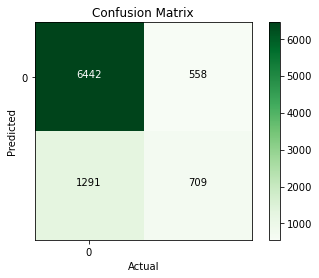

In [61]:
#Plotting the Results
cf =confusion_matrix(y_test, y_pred_rf)

import itertools 

plt.imshow(cf,cmap=plt.cm.Greens,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
tick_marks = np.arange(len(set(y_test))-1) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();